In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
import pandas as pd
from pathlib import Path

# Using pathlib to create the path
data_path = Path("C:/Users/jackk/OneDrive/Desktop/peak ai hackathon/DataDawgs-Peak-Hackathon-2024-/data/Dataset.csv")

# Read the CSV file with the specified encoding
try:
    superstore_dataset = pd.read_csv(data_path, encoding='latin1')
    print("File successfully loaded.")
    print(superstore_dataset.head())  # Display the first few rows of the dataframe
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the path and try again.")
except pd.errors.EmptyDataError:
    print("No data: The file is empty.")
except pd.errors.ParserError:
    print("Parse error: The file could not be parsed.")
except Exception as e:
    print(f"An error occurred: {e}")


File successfully loaded.
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  #NAME?  US-2019-103800  03/01/2019  07/01/2019  Standard Class    DP-13000   
1  #NAME?  US-2019-112326  04/01/2019  08/01/2019  Standard Class    PO-19195   
2  #NAME?  US-2019-112326  04/01/2019  08/01/2019  Standard Class    PO-19195   
3  #NAME?  US-2019-112326  04/01/2019  08/01/2019  Standard Class    PO-19195   
4  #NAME?  US-2019-141817  05/01/2019  12/01/2019  Standard Class    MB-18085   

   Customer Name      Segment        Country          City  ... Postal Code  \
0  Darren Powers     Consumer  United States       Houston  ...       77095   
1  Phillina Ober  Home Office  United States    Naperville  ...       60540   
2  Phillina Ober  Home Office  United States    Naperville  ...       60540   
3  Phillina Ober  Home Office  United States    Naperville  ...       60540   
4     Mick Brown     Consumer  United States  Philadelphia  ...       19143   

    Region  

C:\Users\jackk\AppData\Local\Temp\ipykernel_3752\2469863516.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  superstore_dataset = pd.read_csv(data_path, encoding='latin1')


# how effective are promotional campaigns

In [159]:
# Ensure the date columns are in datetime format
superstore_dataset['Order Date'] = pd.to_datetime(superstore_dataset['Order Date'])





c:\Users\jackk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\jackk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\jackk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\jackk\AppData\Local\Programs\Python\Python310\lib\site-packag

In [160]:

superstore_dataset["Order Date"] = pd.to_datetime(superstore_dataset["Order Date"])

In [161]:
sub_categories = superstore_dataset["Sub-Category"].unique()

In [162]:
# in this chunk of code we first created a df for each subcategory, then converted discouts into binary where when no discount is applied the number is 0, else its 1



for sub_category in sub_categories:
    # Ensure sub_category is a string and replace spaces with underscores
    sub_category_str = str(sub_category).replace(" ", "_")
    # Create a DataFrame for the sub-category
    df = superstore_dataset[superstore_dataset["Sub-Category"] == sub_category].copy()
    # Convert "Discount" to binary
    df["Discount_binary"] = df["Discount"].apply(lambda x: 1 if x != 0 else 0)
    # add year column
    df["Year"] = df["Order Date"].dt.year
    # Sort by "Order Date"
    df = df.sort_values(by="Order Date")
    # Dynamically assign the DataFrame to a variable named after the sub-category
    globals()[sub_category_str + "_df"] = df

In [163]:
superstore_dataset["Sub-Category"].values

array(['Paper', 'Binders', 'Labels', ..., nan, nan, nan], dtype=object)

In [164]:
Paper_df["Discount_binary"]


16742    1
10440    0
10442    0
12034    1
13388    1
        ..
30325    0
30335    0
30336    1
30354    0
30369    0
Name: Discount_binary, Length: 4410, dtype: int64

In [228]:
# Set the "Order Date" to monthly period
Paper_df["Month"] = Paper_df["Order Date"].dt.to_period("M")

# Group by the monthly period and aggregate (calculate median directly)
monthly_group = Paper_df.groupby(["Month", "Year"]).agg(
    discount_frequency=("Discount_binary", "sum"),
    median_discount_percentage=("Discount", "median"),
    average_discount_percentage = ("Discount", "mean") , # Calculate median directly
    total_sales=("Sales", "sum"),  # Sum of sales for each month
    total_profit=("Profit", "sum")  # Sum of profit for each month
).reset_index()

# Calculate average sales and profit across years (using median)
monthly_group = monthly_group.groupby("Month").agg(
    average_discount_frequency=("discount_frequency", "mean"),
    median_discount_percentage=("median_discount_percentage", "mean"),  # Average median
    average_discount_percentage=("average_discount_percentage", "mean"),  # Correct column name
    average_sales=("total_sales", "mean"),  # Average sales per month
    average_profit=("total_profit", "mean")  # Average profit per month
).reset_index()

monthly_group = monthly_group.sort_values(by='Month')

# Convert "Month" to month numbers (1-12)
monthly_group["Month"] = monthly_group["Month"].dt.month

# Now you have monthly_group with all the aggregations
print(monthly_group)


     Month  average_discount_frequency  median_discount_percentage  \
0        1                         7.0                         0.0   
1        2                         7.0                         0.1   
2        3                        12.0                         0.2   
3        4                         3.0                         0.0   
4        5                         6.0                         0.0   
..     ...                         ...                         ...   
127      8                        15.0                         0.0   
128      9                        23.0                         0.0   
129     10                        21.0                         0.2   
130     11                        21.0                         0.0   
131     12                        15.0                         0.0   

     average_discount_percentage  average_sales  average_profit  
0                       0.087500        641.596        275.7026  
1                       0.1

In [229]:
# for paper df , plot a graph where x variable is the date and y is the binary for discounts


monthly_group


,Month,average_discount_frequency,median_discount_percentage,average_discount_percentage,average_sales,average_profit
0,1,7.0,0.0,0.087500,641.596,275.7026
1,2,7.0,0.1,0.100000,406.528,176.8993
2,3,12.0,0.2,0.109091,1221.662,488.4249
3,4,3.0,0.0,0.050000,1139.818,524.9921
4,5,6.0,0.0,0.050000,858.888,390.6325
...,...,...,...,...,...,...
127,8,15.0,0.0,0.093750,2442.550,1062.1076
128,9,23.0,0.0,0.073016,4456.402,1897.0374
129,10,21.0,0.2,0.116667,1554.064,632.9708
130,11,21.0,0.0,0.093333,2454.410,1040.8313


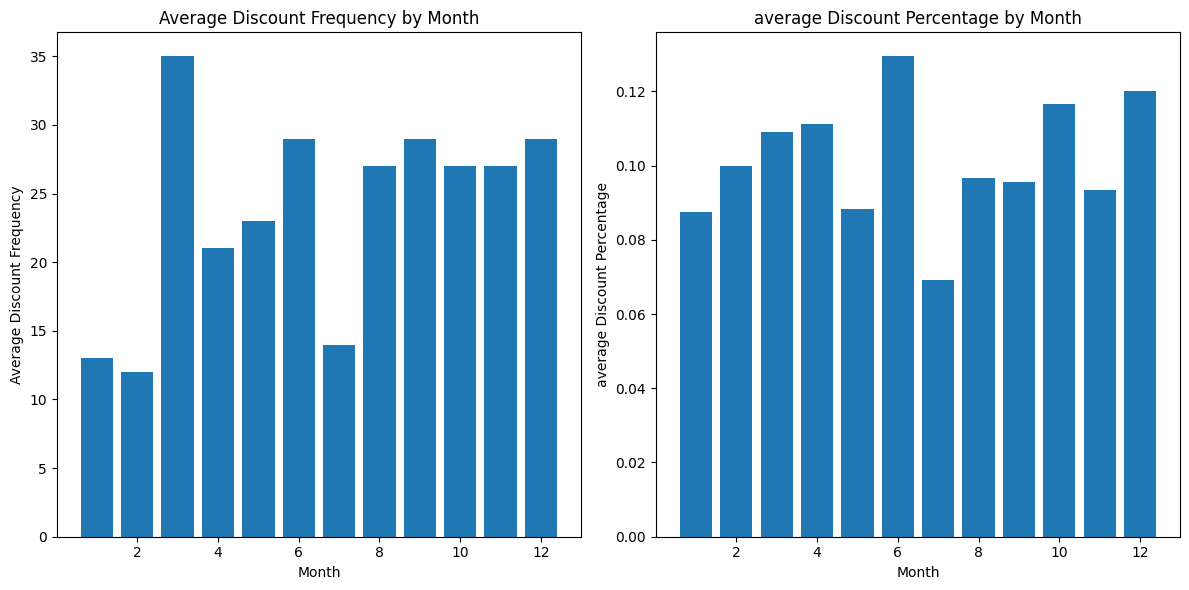

In [233]:
# Assuming 'monthly_averages' is already calculated (and likely aggregated by month)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot average discount frequency
axes[0].bar(monthly_group['Month'], monthly_group['average_discount_frequency'])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Discount Frequency')
axes[0].set_title('Average Discount Frequency by Month')

# Plot median discount percentage
axes[1].bar(monthly_group['Month'], monthly_group['average_discount_percentage'])  # Use 'average_discount_percentage'
axes[1].set_xlabel('Month')
axes[1].set_ylabel('average Discount Percentage')
axes[1].set_title('average Discount Percentage by Month')

plt.tight_layout()
plt.show()

In [234]:
#create the linear regression for discount percentage, discount frequency and sales and profits

monthly_group.columns


Index(['Month', 'average_discount_frequency', 'median_discount_percentage',
       'average_discount_percentage', 'average_sales', 'average_profit'],
      dtype='object')

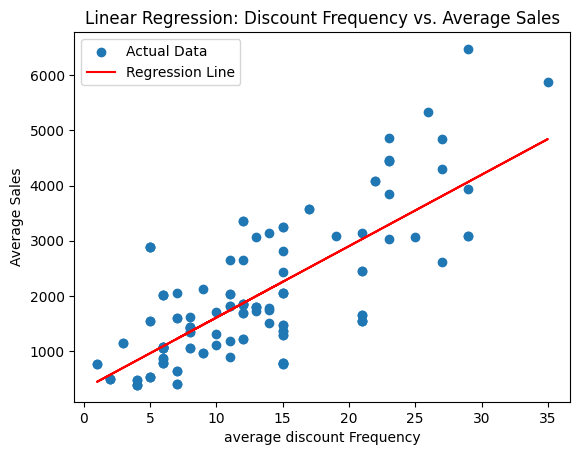

Mean Squared Error (MSE): 656291.9102062213
R-squared (R2): 0.5721912385101573


In [235]:
# linear regression for discount frequency against sales
X = monthly_group['average_discount_frequency'].values.reshape(-1, 1)  # Discount frequency (independent variable)
y = monthly_group['average_sales'].values  # Average sales (dependent variable)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualize the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('average discount Frequency')
plt.ylabel('Average Sales')
plt.title('Linear Regression: Discount Frequency vs. Average Sales')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



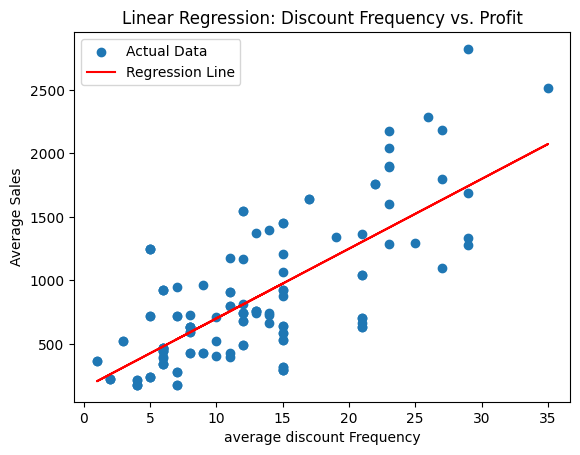

Mean Squared Error (MSE): 137623.9395486033
R-squared (R2): 0.5345032509108261


In [238]:
# linear regression for discount frequency against sales
X = monthly_group['average_discount_frequency'].values.reshape(-1, 1)  # Discount frequency (independent variable)
y = monthly_group['average_profit'].values  # Average sales (dependent variable)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualize the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('average discount Frequency')
plt.ylabel('Average Sales')
plt.title('Linear Regression: Discount Frequency vs. Profit')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

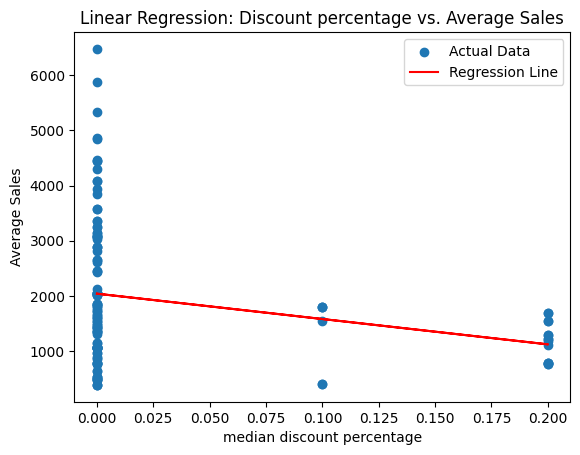

Mean Squared Error (MSE): 1444375.4487800626
R-squared (R2): 0.05847312413957462


In [221]:
# linear regression for discount frequency against sales
X = monthly_group['median_discount_percentage'].values.reshape(-1, 1)  # Discount frequency (independent variable)
y = monthly_group['average_sales'].values  # Average sales (dependent variable)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualize the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('median discount percentage')
plt.ylabel('Average Sales')
plt.title('Linear Regression: Discount percentage vs. Average Sales')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

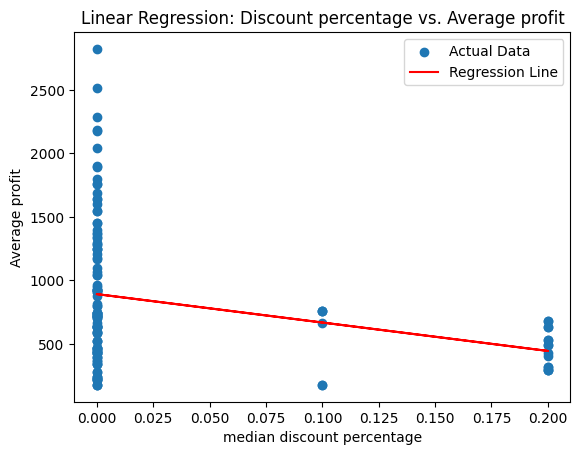

Mean Squared Error (MSE): 274370.0305053224
R-squared (R2): 0.07197572118170592


In [240]:
# linear regression for discount frequency against sales
X = monthly_group['median_discount_percentage'].values.reshape(-1, 1)  # Discount frequency (independent variable)
y = monthly_group['average_profit'].values  # Average sales (dependent variable)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualize the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('median discount percentage')
plt.ylabel('Average profit')
plt.title('Linear Regression: Discount percentage vs. Average profit')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

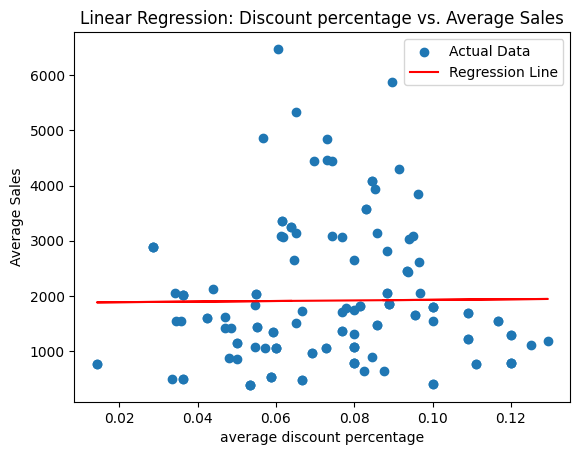

Mean Squared Error (MSE): 1533903.204297436
R-squared (R2): 0.00011379102693875875


In [236]:
# linear regression for discount frequency against sales
X = monthly_group['average_discount_percentage'].values.reshape(-1, 1)  # Discount frequency (independent variable)
y = monthly_group['average_sales'].values  # Average sales (dependent variable)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualize the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('average discount percentage')
plt.ylabel('Average Sales')
plt.title('Linear Regression: Discount percentage vs. Average Sales')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

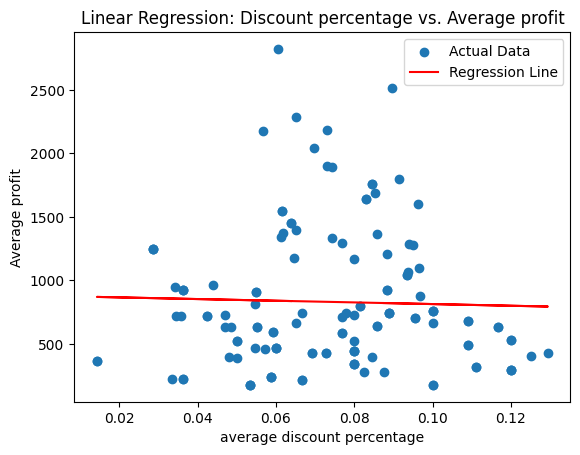

Mean Squared Error (MSE): 295384.23557250923
R-squared (R2): 0.0008976502039883538


In [241]:
# linear regression for discount frequency against sales
X = monthly_group['average_discount_percentage'].values.reshape(-1, 1)  # Discount frequency (independent variable)
y = monthly_group['average_profit'].values  # Average sales (dependent variable)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualize the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('average discount percentage')
plt.ylabel('Average profit')
plt.title('Linear Regression: Discount percentage vs. Average profit')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")